# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 


## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?


### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [69]:
import numpy as np
import scipy
import wave
import librosa
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt 
from scipy.io import wavfile
import scipy.io
from pylab import rcParams
%matplotlib inline

In [47]:
wav_fname = 'resources/zhuikov_lab1.wav'

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 


Согласно документации, scipy.io.wavfile.read(somefile) возвращает кортеж из двух элементов: первый - это частота дискретизации в выборках в секунду, второй-массив numpy со всеми данными, считанными из файла

In [70]:
samplerate, data = wavfile.read(wav_fname)

In [71]:
# Частота дискретизации
samplerate

44100

In [72]:
# Массив данных звука, число каналов=2
data

array([[  1,   0],
       [ -2,   0],
       [  3,   0],
       ...,
       [-10,  -3],
       [ -7,  -3],
       [-14,   1]], dtype=int16)

In [73]:
# Длительность сигнала
length = data.shape[0] / samplerate

In [74]:
length

16.138480725623584

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

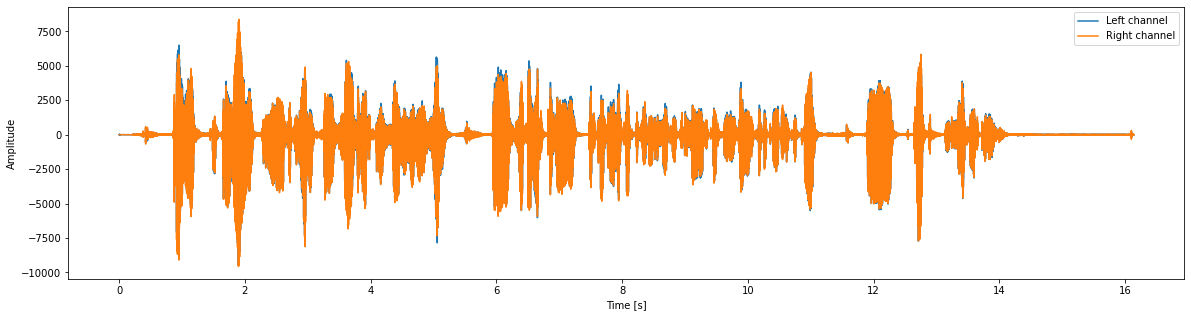

In [75]:
rcParams['figure.figsize'] = 20, 5
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [81]:
# Оригинал сигнала

ipd.Audio(wav_fname)

In [82]:
# Используя библиотеку wave

wav = wave.open(wav_fname, mode="r")
params = wav.getparams()
framerate = params[2]
sampwidth = params[1]
params

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=711707, comptype='NONE', compname='not compressed')

In [83]:
print(f"Частота дискретизции - {framerate}")

Частота дискретизции - 44100


Параметр sampwidth разрядность квантования в байтах:
* 1 = 8 бит,
* 2 = 16 бит, 
* 4 = 32 бит, 

In [84]:
print(f"Разрядность квантования - {sampwidth * 8} бит") 

Разрядность квантования - 16 бит


In [106]:
x , sr_original = librosa.load(wav_fname, sr=None)

In [107]:
ipd.Audio(wav_fname)

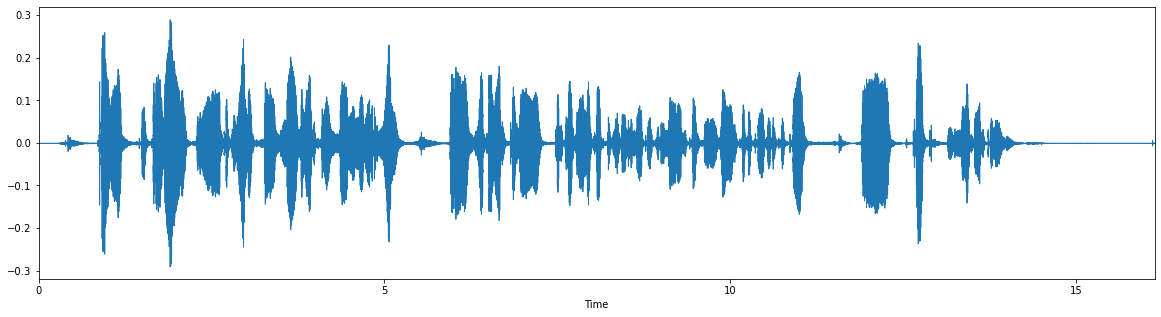

In [108]:
# Оригинальная частота
librosa.display.waveplot(x, sr=sr_original)

Text(0.5, 1.0, 'Частота дискретизации: 5512')

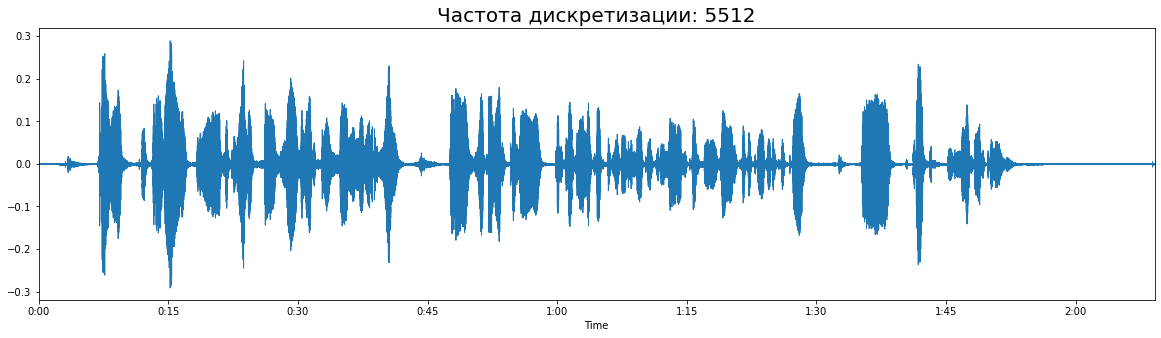

In [112]:
# Уменьшаем частоту в 8 раз
sr = int(sr_original / 8)
librosa.display.waveplot(x, sr=sr)
plt.title(f'Частота дискретизации: {sr}', fontsize=20)

In [110]:
ipd.Audio(x[::8], rate=sr)

Text(0.5, 1.0, 'Частота дискретизации: 2940')

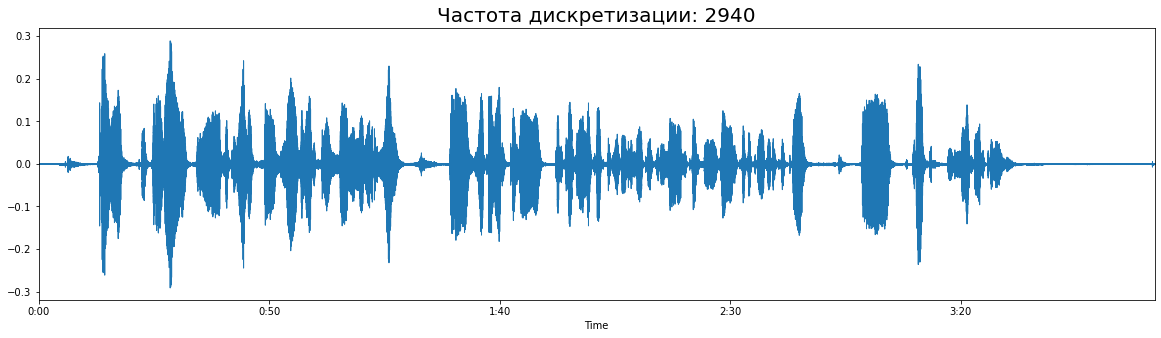

In [124]:
sr = int(sr_original / 15)
librosa.display.waveplot(x, sr=sr)
plt.title(f'Частота дискретизации: {sr}', fontsize=20)

In [125]:
ipd.Audio(x[::15], rate=sr)

Изначально частота была 44100. При частоте в 15 раз меньше (2940 Гц) уже не слышно речи

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Основное различие .wav формата от .mp3 или .ogg в том, что .wav формат не сжимает данные

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [126]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [127]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

In [12]:
def draw_compare(data_1, data_2, figsize=(25, 14)):
    fig, axes = plt.subplots(2, 1, figsize=figsize)
    for data, i, title in zip([data_1, data_2], [0, 1], ['Origin', 'Handpicked']):
        axes[i].plot(data, linewidth=2)
        axes[i].minorticks_on()
        axes[i].set_xticks(np.arange(0, 1000, step=100))
        axes[i].set_yticks(np.arange((data.min().round())//10*10, 
                             (data.max().round())//10*10+10, step=5))
        axes[i].grid(which='major',
            color = 'k', 
            linewidth = 1)
        axes[i].grid(which='minor', 
            color = 'k', 
            linestyle = ':')
        axes[i].set_title(title, fontsize=20)
    plt.show()

In [13]:
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

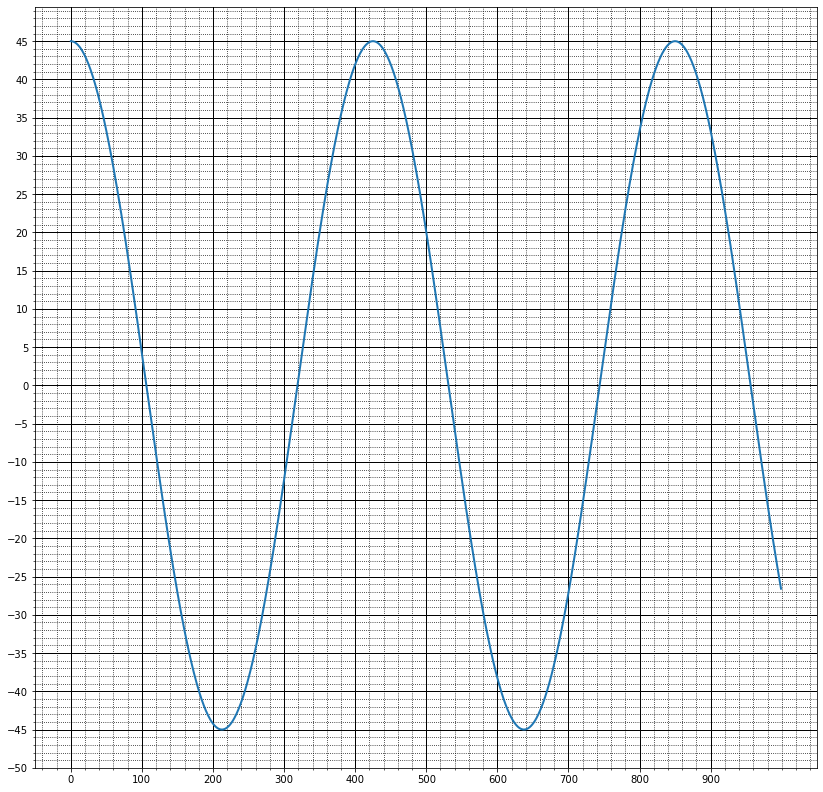

In [128]:
draw_signal(test_data['task2']['a'])

In [130]:
def signal(A, T, phi, n=1000):
    omega = 2 * np.pi / T
    t = np.arange(0, n)
    return A * np.sin(omega*t + phi)

In [143]:
A = 45
T = 425
phi = np.pi / 2
a = signal(A, T, phi)

In [144]:
# YOUR CODE HERE
a = signal(A, T, phi)

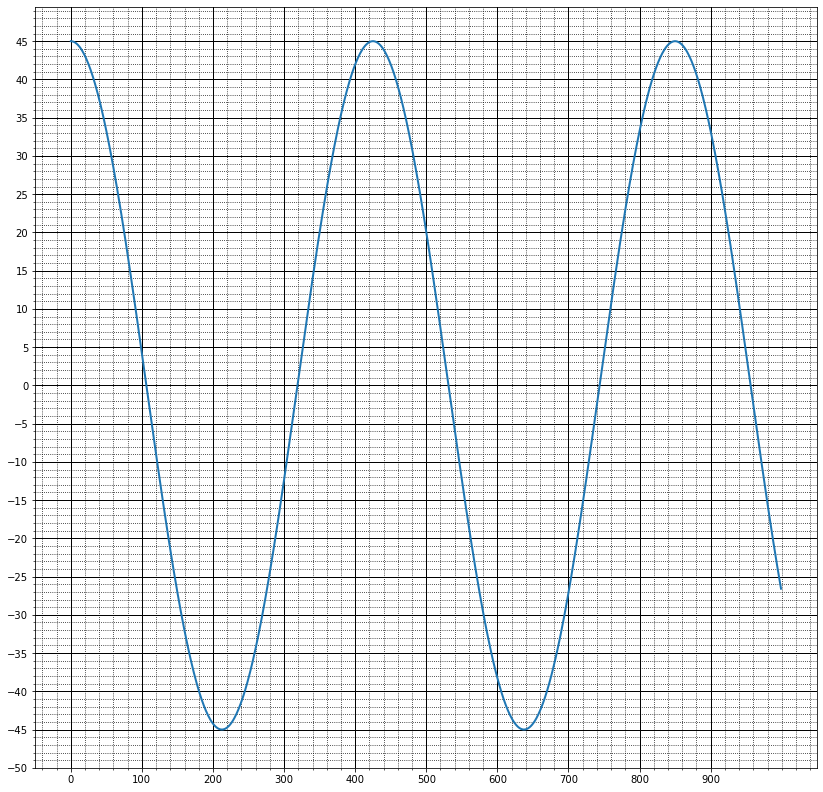

In [145]:
draw_signal(a)

In [146]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


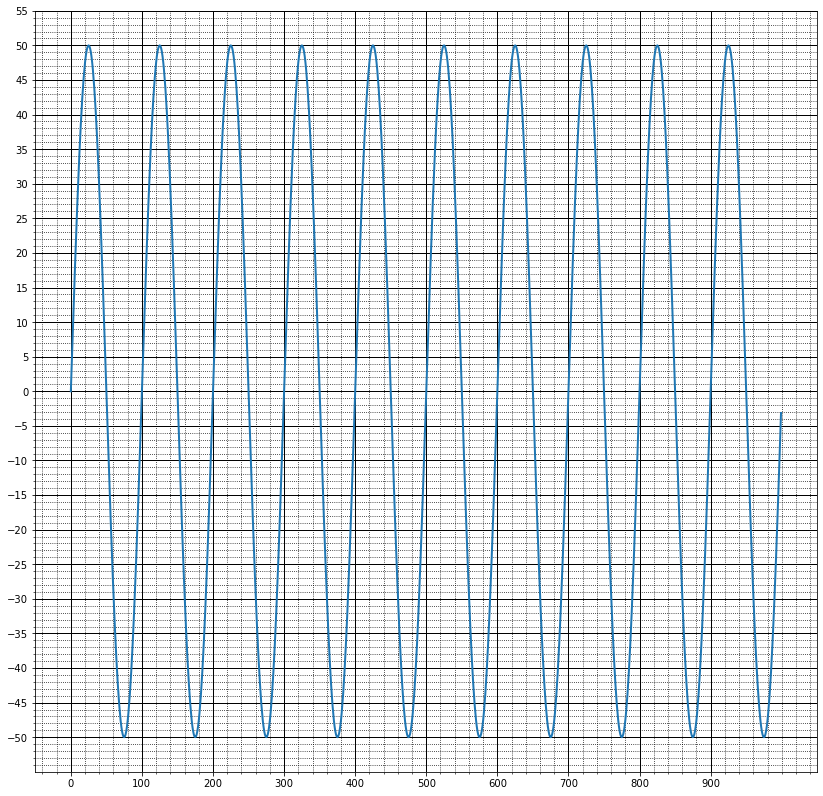

In [147]:
draw_signal(test_data['task2']['b'])

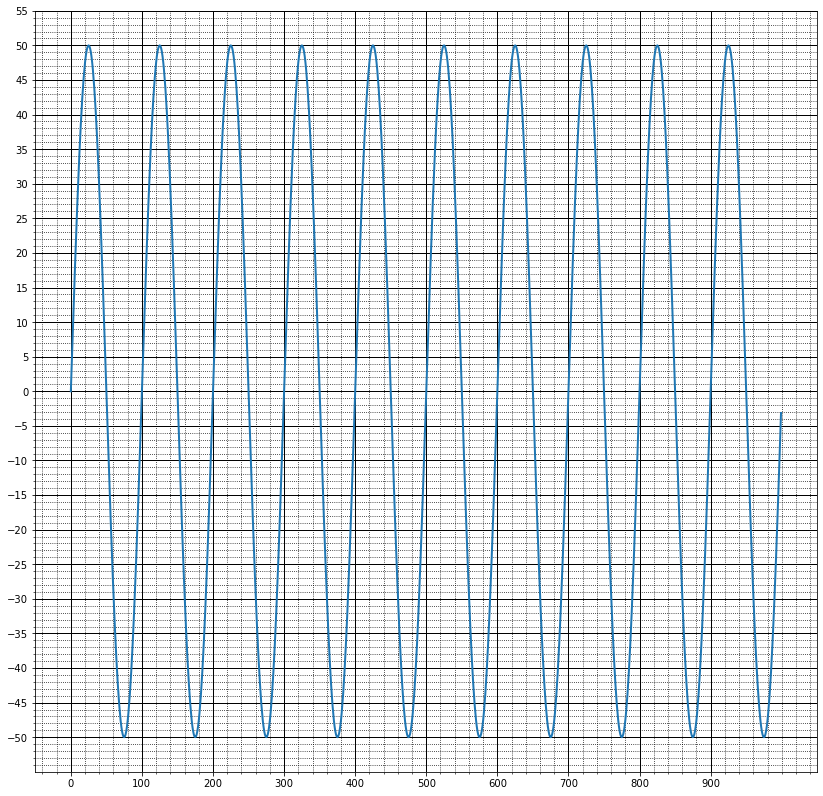

In [153]:
draw_signal(b)

In [148]:
A = 50
T = 100
phi = 0 
b = signal(A, T, phi)

In [149]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


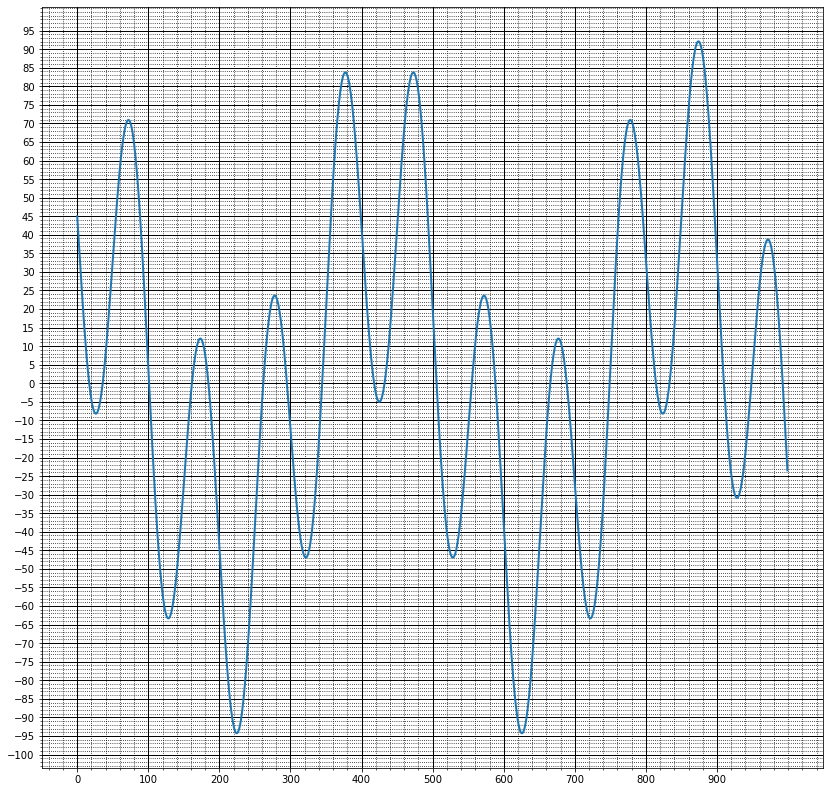

In [150]:
draw_signal(test_data['task2']['c'])

In [151]:
A_1 = 45
T_1 = 425
phi_1 = np.pi / 2

A_2 = -50
T_2 = 100
phi_2 = 0 #np.pi / 4

c = signal(A_1, T_1, phi_1) + signal(A_2, T_2, phi_2)

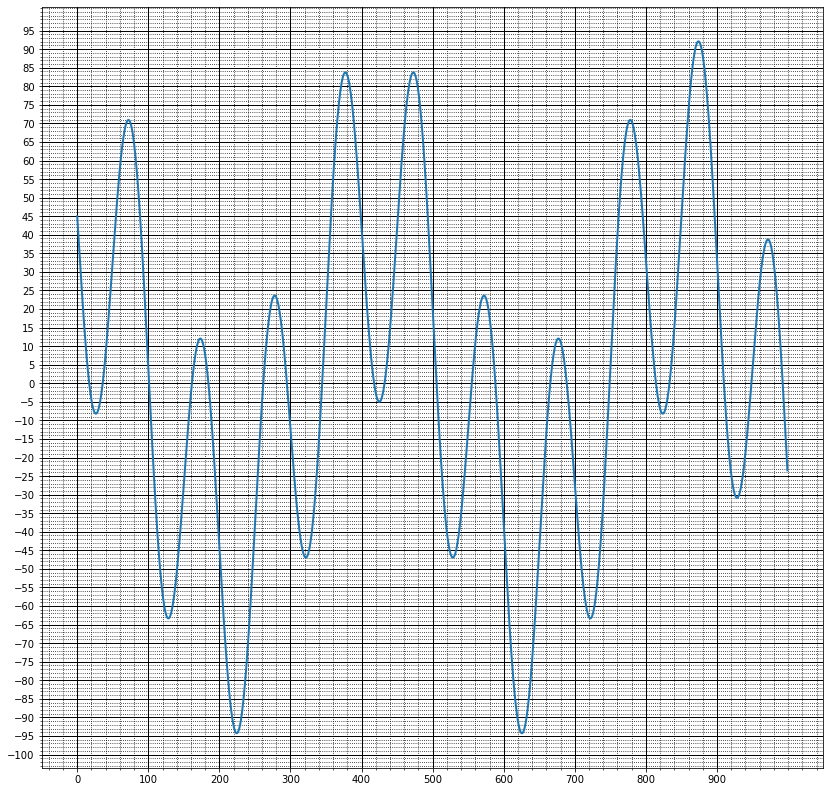

In [154]:
draw_signal(c)

In [152]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [156]:
def convolve(a, b):
    A, B = len(a), len(b)
    a_n = np.concatenate([np.zeros(B - 1, dtype=int), a])
    b_n = np.concatenate([b[::-1], np.zeros(A - 1, dtype=int)])
    return np.array([np.sum(a_n * np.roll(b_n, i)) for i in range(A + B - 1)])

In [157]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [158]:
a = np.repeat([0, 1, 0], 10)
b = np.array([0, 1, 2, 3, 2, 1, 0])

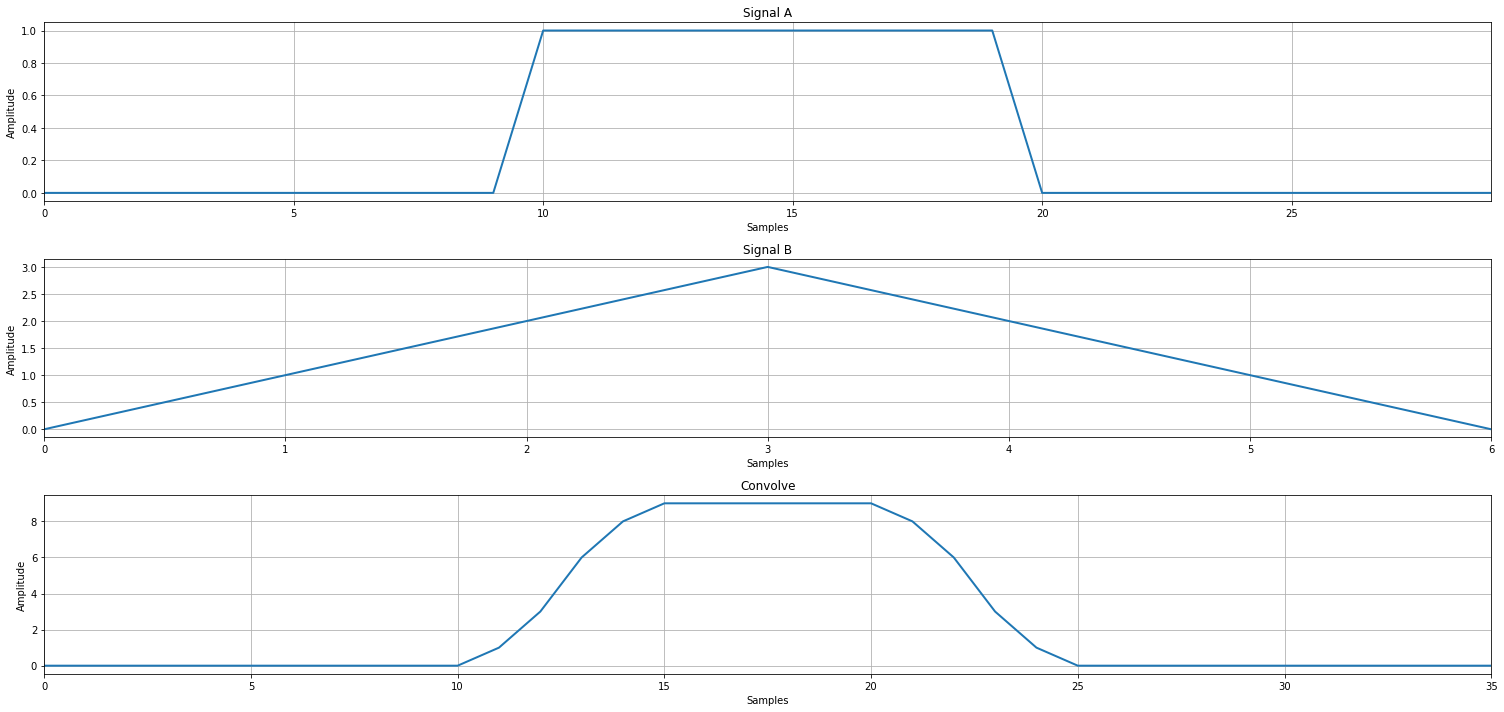

In [159]:
# Нарисуйте результат свертки a и b

signals = [a, b, convolve(a, b)]
titles = ['Signal A', 'Signal B', 'Convolve']
plt.figure(figsize=(21, 10))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(signals[i], linewidth=2.0)
    plt.title(titles[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, signals[i].size-1])
    plt.grid()
plt.tight_layout()

In [160]:
test_convolve(a, b, print_debug=False)

Ok!


## Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE
    #
   
    #
    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

In [ ]:
# Попробуйте покрутить параметры генерации. 
# YOUR CODE HERE 